# Trailor Axle Deflection/Strain Calculation

## Problem Statement
<br>
Trailor, most specifically 40ft tandem axle trailor, contains 4 major assemblies. Main rails, landing gear, axles, and suspension. At rest the trailer is supported at 3 ends: landing gear, front axle, and rear axle. It can be assumed that the weight distribution on the axles assemblies are directly transfered from the mainrails to the axles by the suspension assembly. Since, they are the only point of load transfer it could be assumed that there is a linear relationship between the load on axle, thus its deflection under load, and the load on the trailor. 

![img](https://raw.githubusercontent.com/yunghanjeong/Shear_Moment_Deflection/master/images/trailor_freebodydiagram.PNG)

However, static analysis of the load distribution is impossible since the degrees of freedom in static analysis for this case is -1. Therefore, this statically indeterminate body must be solved using superposition and piecewise by the double integration method. 


## Methods
1. Define governing equations using free body diagram above.
2. Solve the supports piecewise using double integration method using sympy
3. Feed the resulting forces on support as direct forces on the axle
4. Calculate axle deflection and strain 

### Governing Equations

The free body diagram above is unsolvable using classic statical method. Since, there are 3 supports there are 4 variables to solve, but only 3 equations are given: Sum at X, Sum at Y, Sum of Moments. 

Therefore the double integration method must be used to solve for 1 or more variables. 

The essence of the logic is the following. Deflection (2nd derivative of y below) is linearly porportional to the moment and the flexural modulus (EI). The beam at the support locations have 0 deflection since the beam cannot be bent below the support. 

\begin{equation*}
y'' = \frac{M}{EI}
\end{equation*}

Thus the moment equation can be calculated from the free body diagram above and solved with double integraion method above. 

#### Rear Axle (Location C) Moment equation

\begin{equation*}
Mc = Al + Bc - \frac{wl^2}{2}
\end{equation*}

#### Landing Gear (Location A) Moment Equation

\begin{equation*}
Ma = \frac{wx^2}{2} - Cx
\end{equation*}

First equation will be integrated twice with all constants dropping to 0. Once both equatons are solved, the 3rd support equation is easily solved. The moment can be directly calculated once each support is solved. 

### Axle Deflection

The axle deflection is assumed as a simply supporte beam (at each wheel) with two point loads equi-distant from the support (load is transferred by suspension to the axle)

## Solving for Axle Deflection Difference

In [15]:
# Import all necessary libraries.
import os
import src.smd_calc as smd
import matplotlib.pyplot as plt
import numpy as np

In this test the axle length suspension location is considered constant. However, the axle wall thickness can be adjusted for change in flexural modulus. 

In [16]:
trailer = smd.solve_chassis(OD = 5.0, wallthick  = 0.25)

The legal limit on the trailer is generally around 40,000lbs (1000lbs per feet). The trailer is assumed to be a 40ft tandem axle with axle spread of 5 ft. 

In [17]:
#load/ft = 1000lbs/ft, trailer length = 40ft, axle spread = 5ft
#Output:[Load on A, Load on B, Load on C, Moment]
support_load = trailer.solvetrailer(1000,40,5) 

Solving Statically Indeterminate Beam using Double Integration Piece Wise Fx 

REACTIONARY FORCES
A =  9968.7668 lbs
B =  17575.745 lbs
C =  12455.489 lbs
Ma =  -313370.61 lbs*ft


Now that the reactionary forces are known per support, more specifically on each axle, the deflection can be calculated using the load solved above

In [18]:
axle = np.arange(0,49) #set axle as an array for length(x) of  48ft, with dx=1ft
deflection_1 = [trailer.im_def(num,w1=support_load[1]/2,w2=support_load[1]/2) for num in axle]
deflection_2 = [trailer.im_def(num,w1=support_load[2]/2,w2=support_load[2]/2) for num in axle]

The deflection can be visualized with matplotlib

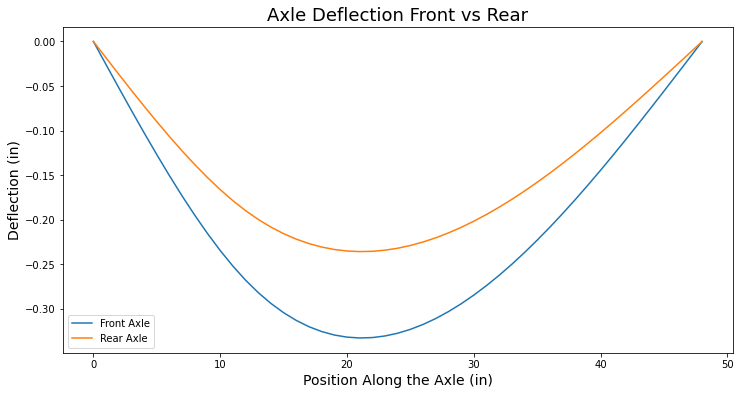

In [19]:
plt.figure(figsize=(12,6))
plt.plot(axle,deflection_1, label = "Front Axle")
plt.plot(axle,deflection_2, label = "Rear Axle")

#Uncomment below to zoom in on the deflection area
#plt.xlim((14,28))
#plt.ylim((-4, -1.8))

#labeling the plot
plt.xlabel("Position Along the Axle (in)", size = 14)
plt.ylabel("Deflection (in)", size = 14)
plt.title("Axle Deflection Front vs Rear", size = 18)

plt.legend();
#uncomment below for image export
#plt.savefig("images/rear_front_axle.png");
plt.show();